In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [4]:
data=pd.read_csv("diabetes.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
X=data.drop('Outcome',axis=1)

In [9]:
y=data['Outcome']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
model=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [12]:
model.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
y_pred=model.predict(X_test)

In [14]:
print("model training successfully\n")

model training successfully



In [15]:
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.703125


In [16]:
print("confusion matrix:",confusion_matrix(y_test,y_pred))

confusion matrix: [[91 32]
 [25 44]]


In [17]:
print("classification report:\n",classification_report(y_test,y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       123
           1       0.58      0.64      0.61        69

    accuracy                           0.70       192
   macro avg       0.68      0.69      0.68       192
weighted avg       0.71      0.70      0.71       192



In [18]:
with open("diabetes_model.pkl","wb") as file:
    pickle.dump(model,file)
print(" model saved successfully as 'diabetes_model.pkl'")    
    

 model saved successfully as 'diabetes_model.pkl'


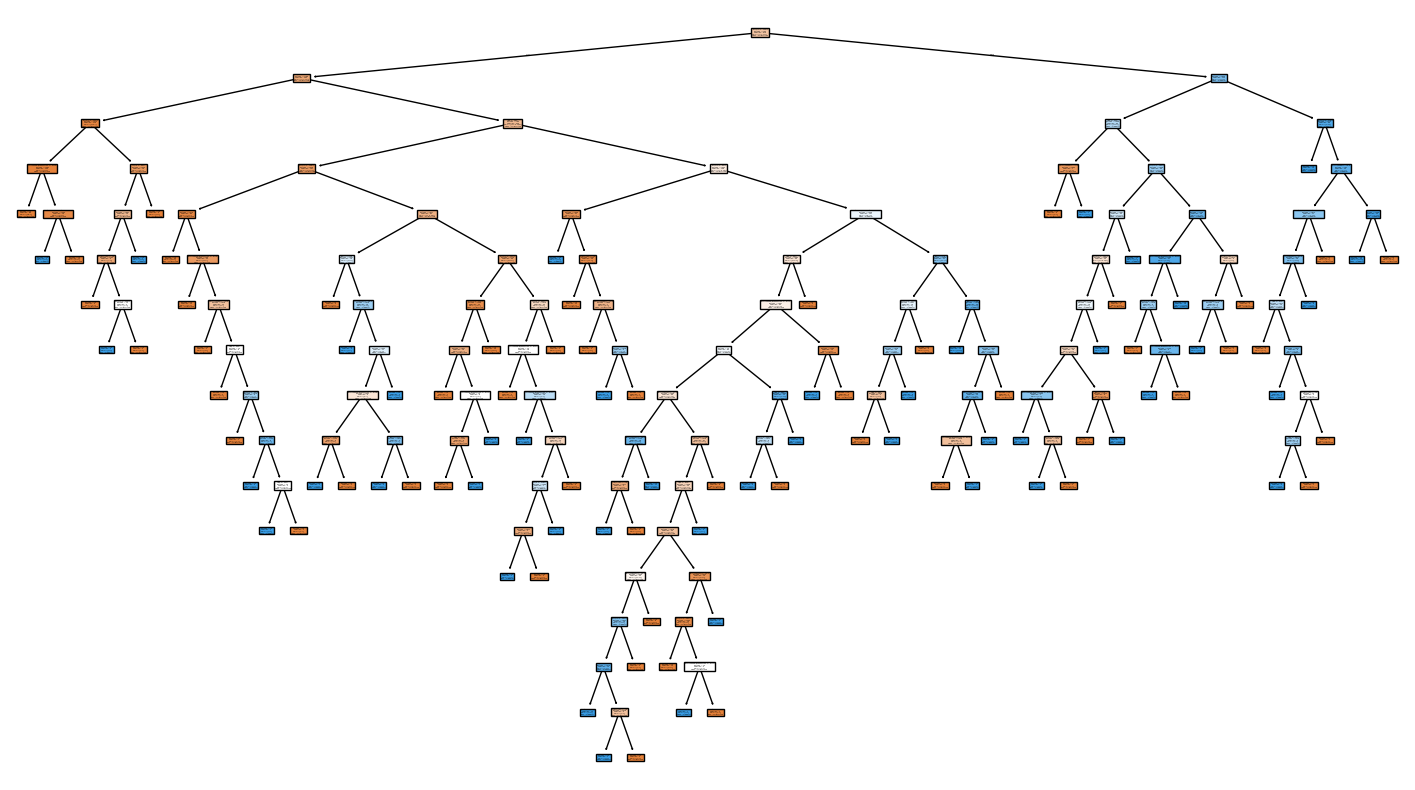

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
plot_tree(model, feature_names=X.columns, class_names=['No Diabetes','Diabetes'], filled=True)
plt.show()
